#Importing the Necessary Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Visualization of Original and Grayscale Images

In [ ]:
image = cv2.imread('/content/ChrisEvans2023.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

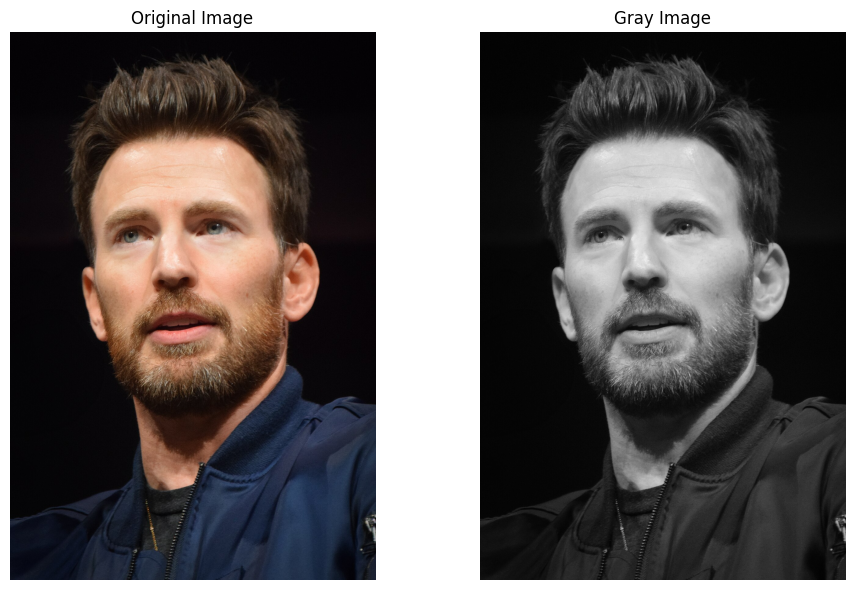

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Canny Edge Detection on Gray Image: Visualizing Edges

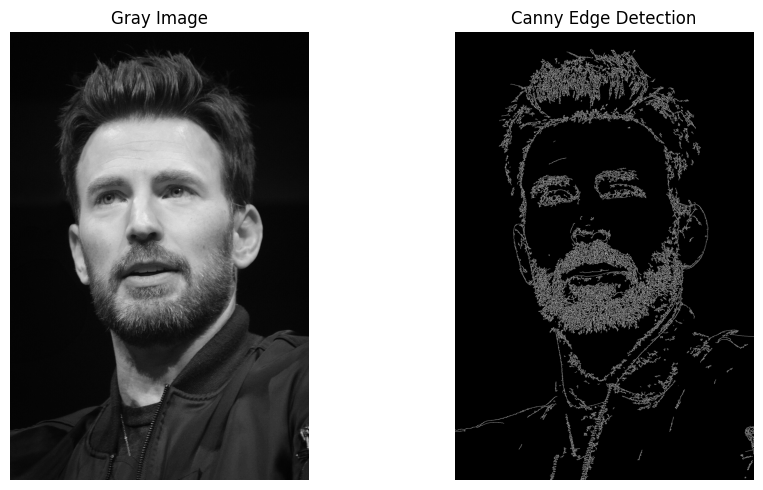

In [ ]:
edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

# Sobel Edge Detection on Gray Image: Visualizing Magnitude of Gradients

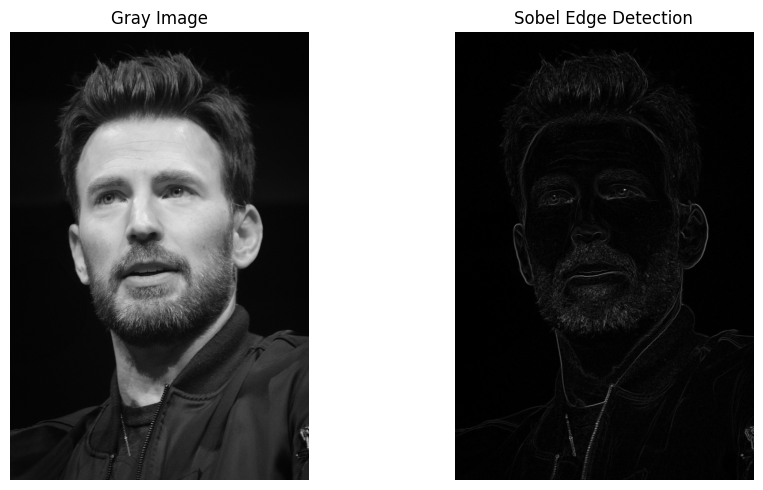

In [ ]:
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)

magnitude = np.hypot(sobel_x, sobel_y)
magnitude = (255 * magnitude / np.max(magnitude)).astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

# Laplacian Edge Detection on Gray Image: Visualizing Sharp Transitions

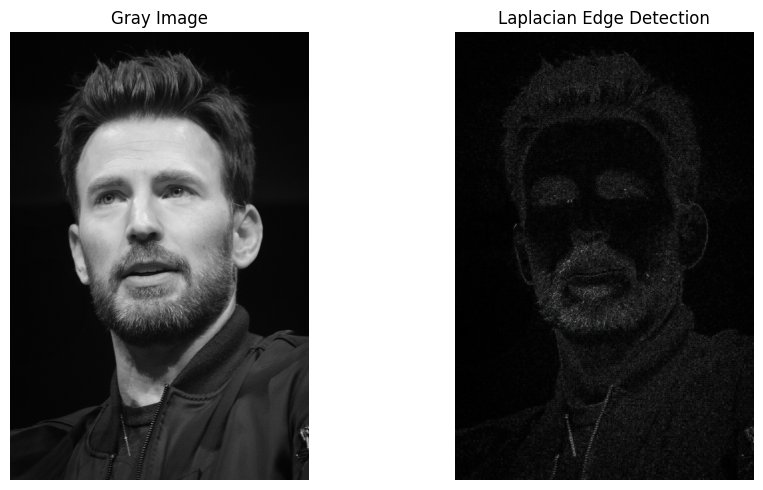

In [ ]:
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = np.uint8(np.abs(laplacian))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

#Kirsch Edge Detection on Gray Image: Highlighting Strong Edges

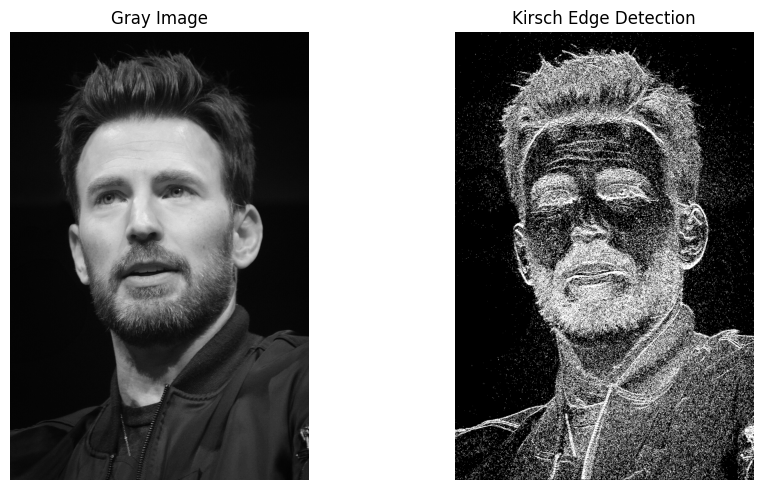

In [ ]:
kirsch_edges = cv2.filter2D(gray_image, cv2.CV_64F, np.array([[3, 5, 3], [0, 0, 0], [-3, -5, -3]]))
kirsch_edges = np.abs(kirsch_edges) > 50

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(kirsch_edges, cmap='gray')
plt.title('Kirsch Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

# Robinson Edge Detection on Gray Image: Emphasizing Edge Directions

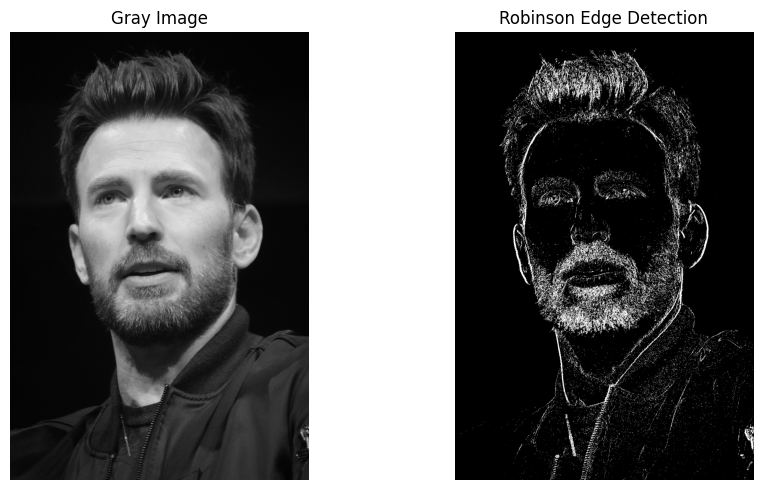

In [ ]:
robinson_edges = cv2.filter2D(gray_image, cv2.CV_64F, np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]))
robinson_edges = np.abs(robinson_edges) > 50

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(robinson_edges, cmap='gray')
plt.title('Robinson Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

# Prewitt Edge Detection on Gray Image: Highlighting Gradient Magnitudes

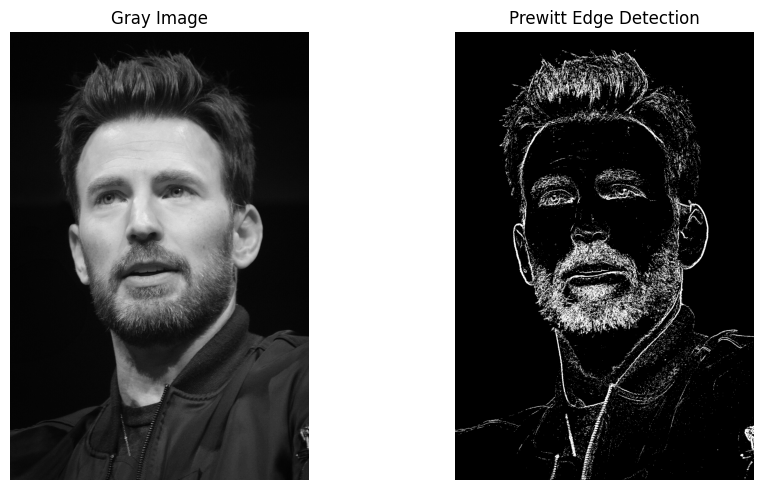

In [ ]:
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])
prewitt_y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]])

prewitt_x_edges = cv2.filter2D(gray_image, cv2.CV_64F, prewitt_x)
prewitt_y_edges = cv2.filter2D(gray_image, cv2.CV_64F, prewitt_y)
prewitt_magnitude = np.sqrt(prewitt_x_edges**2 + prewitt_y_edges**2)
prewitt_edges = prewitt_magnitude > 50


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

# Roberts Edge Detection on Gray Image: Detecting High-Contrast Edges

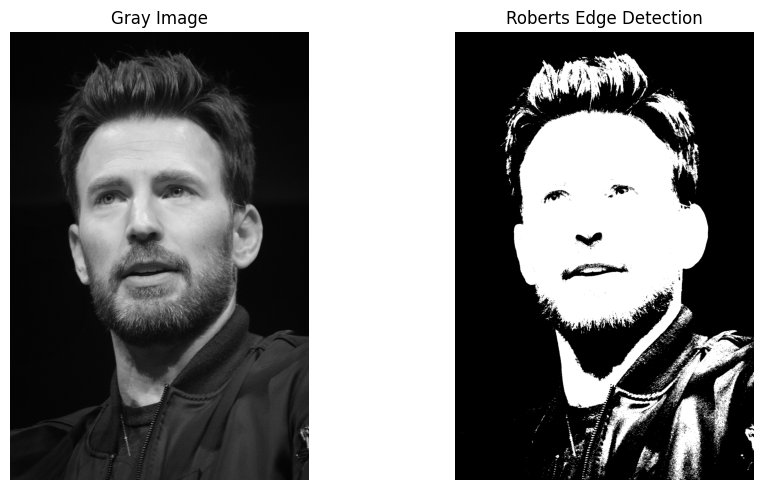

In [ ]:
roberts_kernel = np.array([[-1, 0], [0, -1]])
roberts_edges = cv2.filter2D(gray_image, cv2.CV_64F, roberts_kernel)
roberts_edges = np.abs(roberts_edges) > 100


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(roberts_edges, cmap='gray')
plt.title('Roberts Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

# Canny Edge Detection with Overlay: Enhancing Original Image with Green Edges

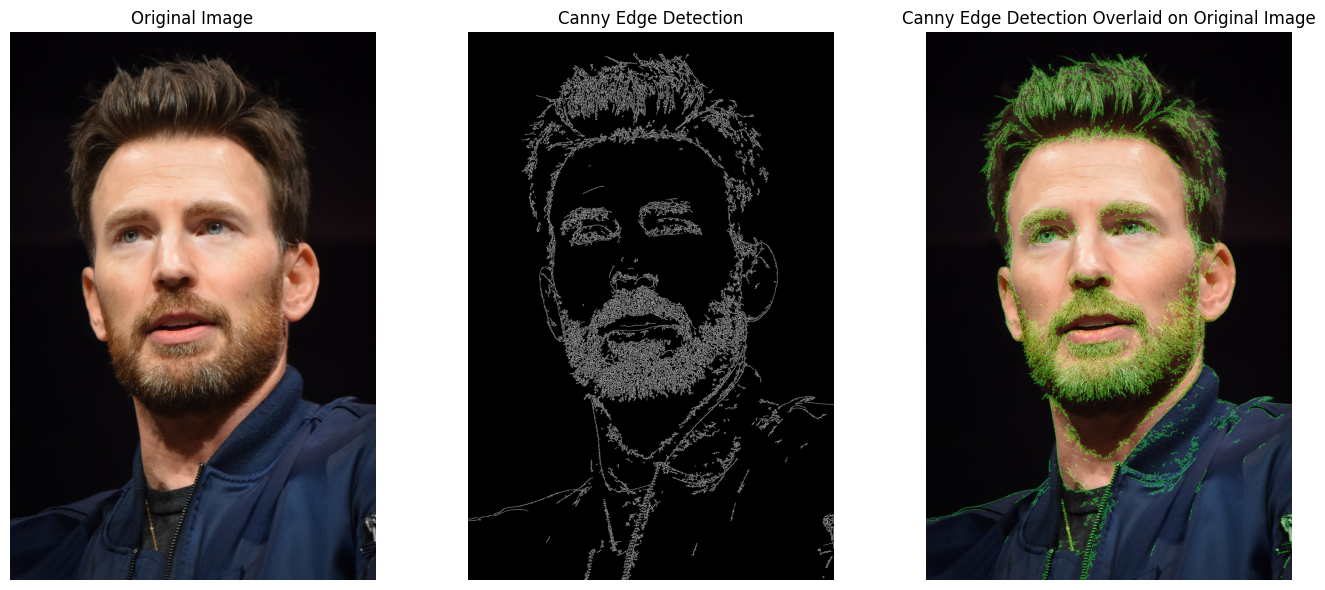

In [ ]:
edge_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
edge_colored[edges != 0] = [0, 255, 0]

combined_image = cv2.addWeighted(image, 1, edge_colored, 0.7, 0)

plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.title('Canny Edge Detection Overlaid on Original Image')
plt.axis('off')

plt.tight_layout()
plt.show()